In [2]:
import torch
from torch import nn,optim
import torch.nn.functional
import torch.nn.functional as F
import numpy as np
import pandas as pd
import os as os
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path_train = 'C:\\Users\\Alexandru.Dediu\\Documents\\Data-Challenge-PHM-Asia-Pacific-2023\\dataset\\train'
path_data = "\\data"
path_labels = "\\labels.xlsx"


# create data df
frames = []

for filename in os.listdir(path_train+path_data):
    if filename.endswith('.csv'):
       
        percorso_file = os.path.join(path_train+path_data, filename)
        df = pd.read_csv(percorso_file)
        frames.append(df)

df_data = pd.concat(frames, ignore_index=True)



df_data



,TIME,P1,P2,P3,P4,P5,P6,P7
0,0.000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
1,0.001,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
2,0.002,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
3,0.003,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
4,0.004,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
...,...,...,...,...,...,...,...,...
212572,1.196,1.948734,1.912482,1.904362,1.835654,1.924899,1.857220,1.920020
212573,1.197,1.948823,1.899824,1.884360,1.825497,1.927513,1.846068,1.919081
212574,1.198,1.957784,1.911383,1.893740,1.859805,1.940953,1.861668,1.950562
212575,1.199,1.970451,1.950009,1.945417,1.913911,1.953648,1.835381,1.983321


In [4]:

# create labels df
df_labels = pd.read_excel(path_train + path_labels, header=[0, 1])

df_labels


Case#        Spacecraft#          Condition  \
    Unnamed: 0_level_1 Unnamed: 1_level_1 Unnamed: 2_level_1   
0                    1                  1             Normal   
1                    2                  1             Normal   
2                    3                  1             Normal   
3                    4                  1             Normal   
4                    5                  1             Normal   
..                 ...                ...                ...   
172                173                  3            Anomaly   
173                174                  3            Anomaly   
174                175                  3            Anomaly   
175                176                  3            Anomaly   
176                177                  3            Anomaly   

    Solenoid valves Opening Ratio /%                Bubble                    \
                                 SV1  SV2  SV3  SV4    BP1 BP2 BP3  BP4  BP5   
0                                100  100  100  100     No  No  No   No   No   
1                                100  100  100  100     No  No  No   No   No   
2                                100  100  100  100     No  No  No   No   No   
3                                100  100  100  100     No  No  No   No   No   
4                                100  100  100  100     No  No  No   No   No   
..                               ...  ...  ...  ...    ...  ..  ..  ...  ...   
172                              100  100  100  100     No  No  No  Yes   No   
173                              100  100  100  100     No  No  No   No  Yes   
174                              100  100  100  100     No  No  No   No   No   
175                              100  100  100  100     No  No  No   No   No   
176                              100  100  100  100     No  No  No   No   No   

                    
     BP6  BP7  BV1  
0     No   No   No  
1     No   No   No  
2     No   No   No  
3     No   No   No  
4     No   No   No  
..   ...  ...  ...  
172   No   No   No  
173   No   No   No  
174  Yes   No   No  
175   No  Yes   No  
176   No   No  Yes  

[177 rows x 15 columns]

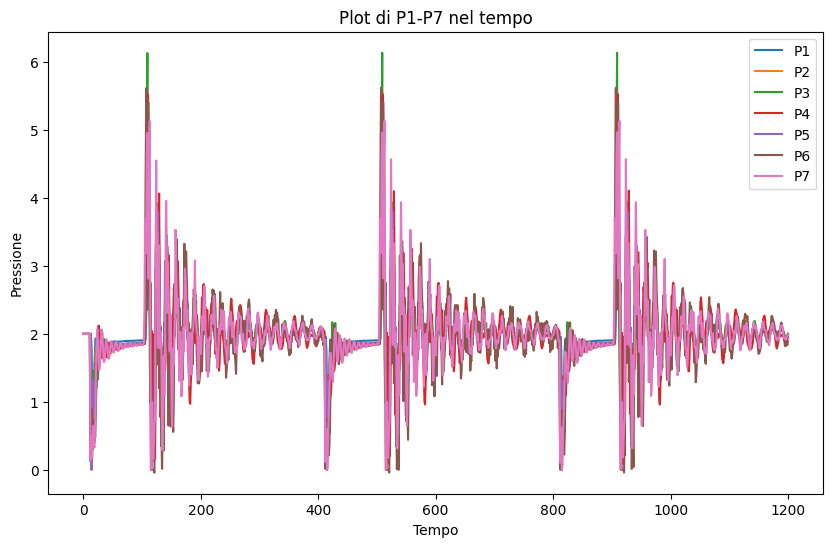

In [5]:
# Plot df data
plt.figure(figsize=(10, 6))

for colonna in df.columns:
    if colonna != "TIME":
        plt.plot(df.index, df[colonna], label=colonna)

plt.xlabel('Tempo')
plt.ylabel('Pressione')
plt.title('Plot di P1-P7 nel tempo')

plt.legend()
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler

# Normalizzazione min-max
scaler = StandardScaler()

df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df_normalized

,TIME,P1,P2,P3,P4,P5,P6,P7
0,-1.730609,0.050869,0.051285,0.049690,0.046246,0.043117,0.106227,0.055320
1,-1.727725,0.050869,0.051285,0.049690,0.046246,0.043117,0.106227,0.055320
2,-1.724841,0.050869,0.051285,0.049690,0.046246,0.043117,0.106227,0.055320
3,-1.721956,0.050869,0.051285,0.049690,0.046246,0.043117,0.106227,0.055320
4,-1.719072,0.050869,0.051285,0.049690,0.046246,0.043117,0.106227,0.055320
...,...,...,...,...,...,...,...,...
1196,1.719072,-0.126471,-0.145062,-0.132480,-0.234861,-0.122644,-0.125472,-0.079103
1197,1.721956,-0.126165,-0.173461,-0.170579,-0.252234,-0.116874,-0.143567,-0.080681
1198,1.724841,-0.095165,-0.147529,-0.152713,-0.193551,-0.087210,-0.118254,-0.027771
1199,1.727725,-0.051348,-0.060869,-0.054280,-0.101005,-0.059190,-0.160910,0.027287


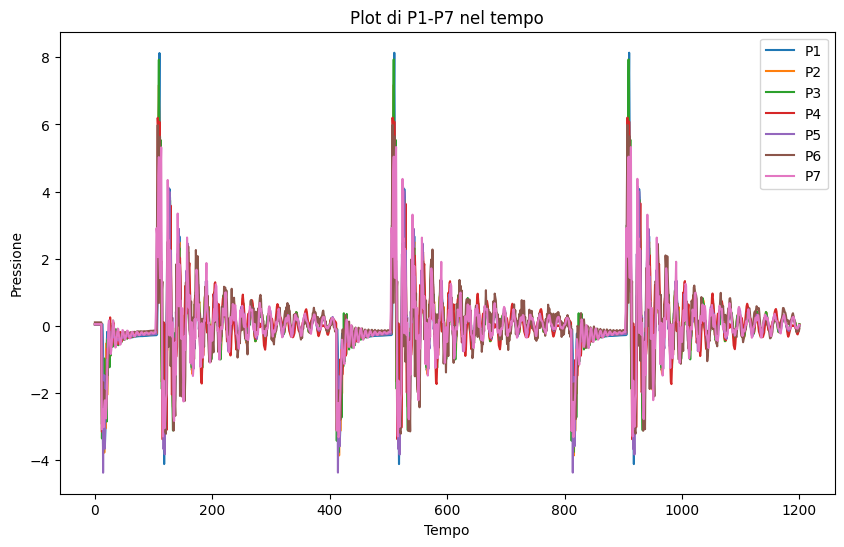

In [7]:
# Plot df data normalized
plt.figure(figsize=(10, 6))
for colonna in df_normalized.columns:
    if colonna != "TIME":
        plt.plot(df_normalized.index, df_normalized[colonna], label=colonna)

plt.xlabel('Tempo')
plt.ylabel('Pressione')
plt.title('Plot di P1-P7 nel tempo')

plt.legend()
plt.show()

In [8]:
from scipy.stats import kurtosis, skew
def extract_temporal_features(time_series):
    features = {
        'Minimo': time_series.min(),
        'Massimo': time_series.max(),
        'Media': time_series.mean(),
        'Mediana': time_series.median(),
        'Primo_Quartile': time_series.quantile(0.25),
        'Terzo_Quartile': time_series.quantile(0.75),
        'Varianza': time_series.var(),
        'Deviazione_Standard': time_series.std(),
        'Kurtosi': kurtosis(time_series),
        'Skewness': skew(time_series)
    }
    return features


temporal_features_list = []

for df in frames:
    df = df.set_index("TIME")
    
# Estraiamo le feature temporali statistiche
        
    # Estraiamo le feature temporali statistiche
    features = extract_temporal_features(df)
    features = pd.DataFrame(features)
    
    # Aggiungi le feature alla lista
    temporal_features_list.append(features)

# Visualizziamo le feature estratte
df_features = pd.concat(temporal_features_list)
df_features


,Minimo,Massimo,Media,Mediana,Primo_Quartile,Terzo_Quartile,Varianza,Deviazione_Standard,Kurtosi,Skewness
P1,0.436248,4.228663,1.984867,1.956786,1.893564,2.059497,0.095184,0.308519,18.304141,1.636982
P2,0.009566,4.550720,1.977633,1.923029,1.842986,2.106798,0.199004,0.446099,8.886967,1.061782
P3,0.001759,4.624689,1.972524,1.923788,1.829711,2.116573,0.257802,0.507742,7.607815,0.870850
P4,0.122087,5.282506,1.976226,1.912265,1.813689,2.124293,0.287829,0.536497,9.033065,1.359759
P5,-0.001758,5.185785,1.977734,1.928335,1.840813,2.110727,0.227351,0.476813,11.035056,1.276122
...,...,...,...,...,...,...,...,...,...,...
P3,-0.003378,6.139742,1.973913,1.936228,1.835394,2.100806,0.275849,0.525213,16.265555,2.106395
P4,-0.000191,5.598166,1.972963,1.921344,1.803647,2.111387,0.342086,0.584882,11.981593,1.691035
P5,0.000563,4.176693,1.980465,1.928023,1.843614,2.105083,0.205441,0.453256,7.630736,0.909473
P6,-0.043870,5.624522,1.934539,1.911232,1.785872,2.147129,0.380061,0.616491,7.897513,0.564622


In [10]:
# Creazione di subplots
fig, axes = plt.subplots(nrows=df_features.shape[0], ncols=1, figsize=(10, 2*df_features.shape[0]))

# Line Plot per ogni colonna e una funzione per ogni indice
for i, index in enumerate(df_features.index):
    for col in df_features.columns:
        df_features[col].loc[index].plot(ax=axes[i], label=col)
    axes[i].set_title(f'{index} - Line Plot')
    axes[i].legend()

# Impostazioni aggiuntive
plt.tight_layout()
plt.show()

KeyboardInterrupt: 